In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('medical_examination.csv')

# Display the first few rows of the dataset to confirm it's loaded correctly
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
# Step 3: Add an overweight column based on BMI calculation
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
df['overweight'] = df['bmi'].apply(lambda x: 1 if x > 25 else 0)

# Display the first few rows to confirm the 'overweight' column is added
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [12]:
# Step 4: Normalize cholesterol and gluc columns (1 = normal, >1 = bad)
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Verify normalization
df[['cholesterol', 'gluc']].head()


,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


In [13]:
# Step 5: Prepare data for the categorical plot
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

# Group and reformat the data by cardio
df_cat = df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="count")

# Display the prepared DataFrame
df_cat.head()


,cardio,variable,value,count
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


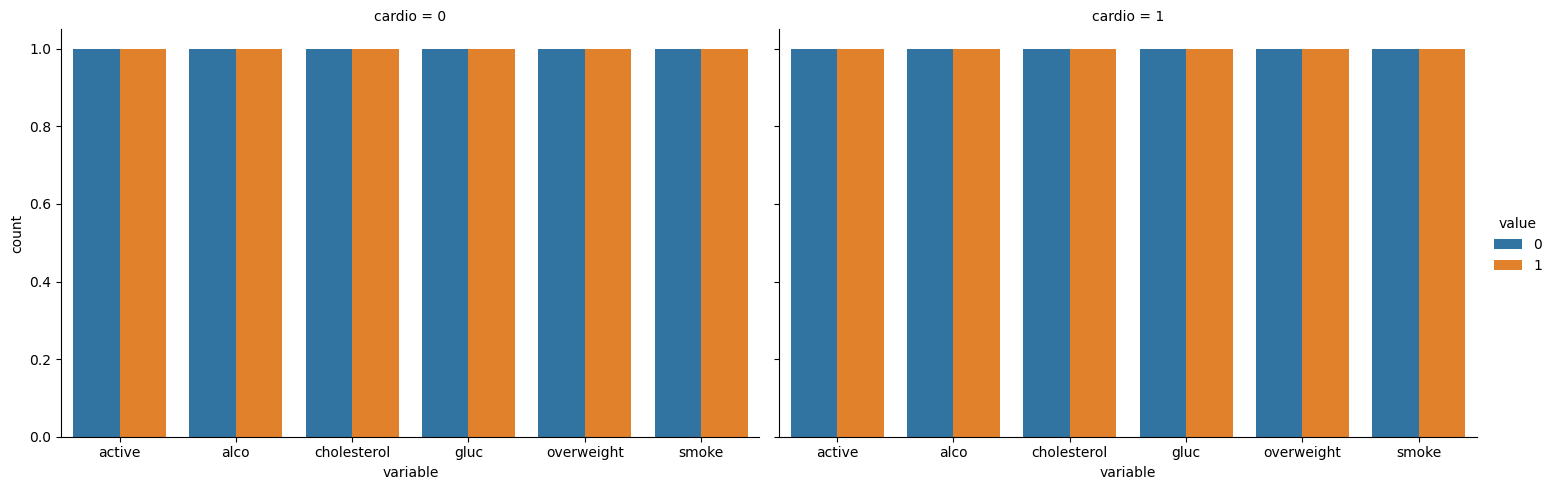

In [14]:
# Step 6: Draw the categorical plot
fig = sns.catplot(x="variable", hue="value", col="cardio", data=df_cat, kind="count", height=5, aspect=1.5)
plt.show()


In [15]:
# Step 7: Clean the data by filtering out incorrect entries
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
             (df['height'] >= df['height'].quantile(0.025)) & 
             (df['height'] <= df['height'].quantile(0.975)) & 
             (df['weight'] >= df['weight'].quantile(0.025)) & 
             (df['weight'] <= df['weight'].quantile(0.975))]

# Display the cleaned data
df_heat.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


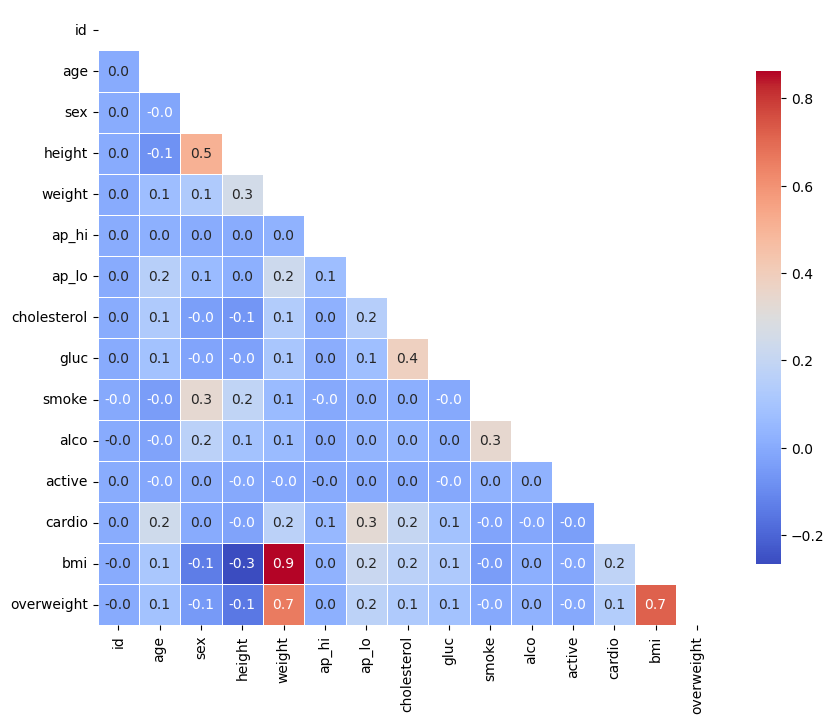

In [16]:
# Step 8: Calculate the correlation matrix
corr = df_heat.corr()

# Step 9: Generate a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Step 10: Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Step 11: Plot the heatmap
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.show()
